In [78]:
import pandas as pd
import os 
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np 
from sklearn.cluster import KMeans
from scipy import stats

import pickle

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from utils.network_analysis import *
from utils.neural_embedding import *

**My calculated scores**

In [79]:
house_scores = pd.read_csv('house_ideological_scores.csv').drop(['Unnamed: 0'], axis=1)
senate_scores = pd.read_csv('senate_ideological_scores.csv').drop(['Unnamed: 0'], axis=1)


**Other results**

In [80]:
congressmember_characteristics = pd.read_csv('data/raw/congressmembers_characteristics.csv').drop(['Unnamed: 0'], axis=1).dropna(subset=['dw.nom.1'])
house = congressmember_characteristics.merge(house_scores[['congressperson', 'first_pc']], on='congressperson', how='inner')
senate = congressmember_characteristics.merge(senate_scores[['congressperson', 'first_pc']], on='congressperson', how='inner')

house_democrats = house[house['party'] == 'D']
house_republicans = house[house['party'] == 'R']

senate_democrats = senate[senate['party'] == 'D']
senate_republicans = senate[senate['party'] == 'R']

In [81]:
def computePearson(x,y):
    corr = np.round(stats.pearsonr(x,y).statistic, 2)
    return corr

In [98]:
computePearson(senate_democrats['Barbera1_score'], senate_democrats['dw.nom.1'])

0.73

[]

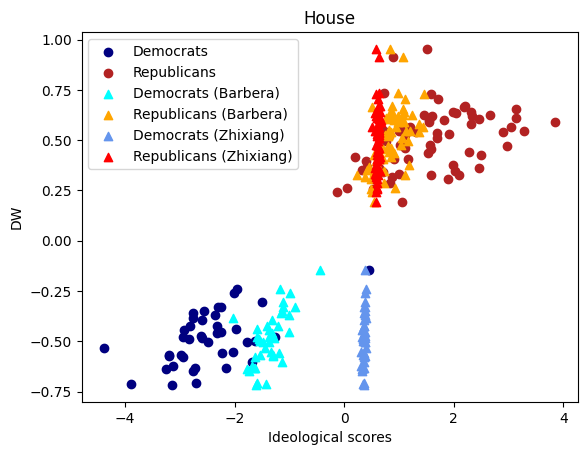

In [75]:
plt.scatter(-1*house_democrats['first_pc'], house_democrats['dw.nom.1'], label='Democrats', color='navy')
plt.scatter(-1*house_republicans['first_pc'], house_republicans['dw.nom.1'], label='Republicans', color='firebrick')

plt.scatter(house_democrats['Barbera1_score'], house_democrats['dw.nom.1'], label='Democrats (Barbera)', color='cyan', marker='^')
plt.scatter(house_republicans['Barbera1_score'], house_republicans['dw.nom.1'], label='Republicans (Barbera)', color='orange', marker='^')

plt.scatter(house_democrats['Zhixiang_score'], house_democrats['dw.nom.1'], label='Democrats (Zhixiang)', color='cornflowerblue', marker='^')
plt.scatter(house_republicans['Zhixiang_score'], house_republicans['dw.nom.1'], label='Republicans (Zhixiang)', color='red', marker='^')

plt.xlabel('Ideological scores')
plt.ylabel('DW')
plt.legend()
plt.title('House')
plt.plot()

[]

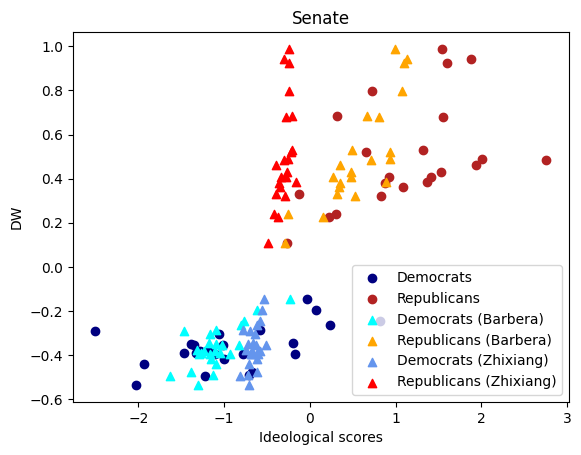

In [74]:
plt.scatter(senate_democrats['first_pc'], senate_democrats['dw.nom.1'], label='Democrats', color='navy')
plt.scatter(senate_republicans['first_pc'], senate_republicans['dw.nom.1'], label='Republicans', color='firebrick')

plt.scatter(senate_democrats['Barbera1_score'], senate_democrats['dw.nom.1'], label='Democrats (Barbera)', color='cyan', marker='^')
plt.scatter(senate_republicans['Barbera1_score'], senate_republicans['dw.nom.1'], label='Republicans (Barbera)', color='orange', marker='^')

plt.scatter(-1*senate_democrats['Zhixiang_score'], senate_democrats['dw.nom.1'], label='Democrats (Zhixiang)', color='cornflowerblue', marker='^')
plt.scatter(-1*senate_republicans['Zhixiang_score'], senate_republicans['dw.nom.1'], label='Republicans (Zhixiang)', color='red', marker='^')

plt.xlabel('Ideological scores')
plt.ylabel('DW')
plt.title('Senate')
plt.legend()
plt.plot()

[]

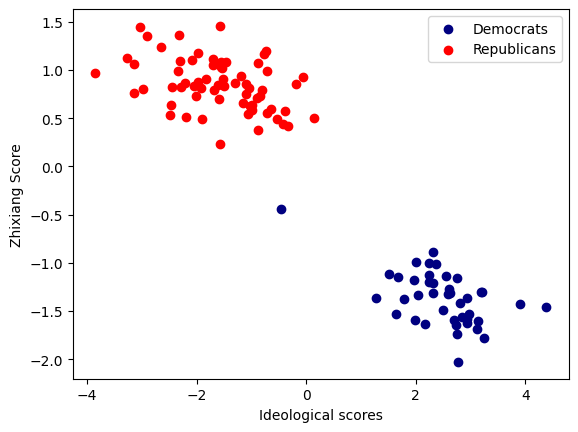

In [57]:
plt.scatter(house_democrats['first_pc'], house_democrats['Barbera1_score'], label='Democrats', color='navy')
plt.scatter(house_republicans['first_pc'], house_republicans['Barbera1_score'], label='Republicans', color='red')
plt.xlabel('Ideological scores')
plt.ylabel('Zhixiang Score')
plt.legend()
plt.plot()

[]

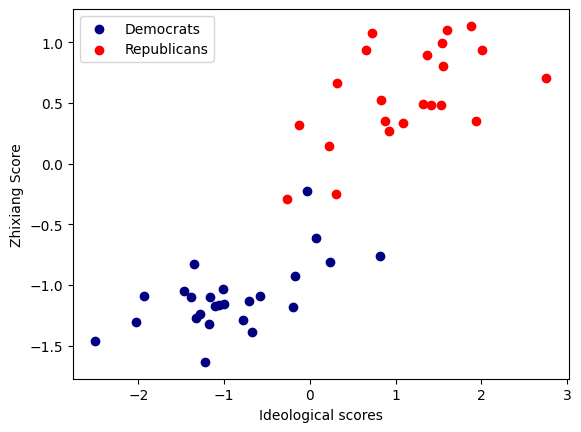

In [58]:
plt.scatter(senate_democrats['first_pc'], senate_democrats['Barbera1_score'], label='Democrats', color='navy')
plt.scatter(senate_republicans['first_pc'], senate_republicans['Barbera1_score'], label='Republicans', color='red')
plt.xlabel('Ideological scores')
plt.ylabel('Zhixiang Score')
plt.legend()
plt.plot()